# Visualizing data

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [12]:
df = pd.read_csv('flow2.csv', parse_dates= True)
df.head()

C:\Users\HF\AppData\Local\Temp\ipykernel_27580\1905802851.py:1: DtypeWarning: Columns (3,5,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('flow2.csv', parse_dates= True)


,Timestamp,Datapath_id,Ip_src,Mac_src,Ip_dst,Mac_dst,Arp,Arp_code,Ip_protocole,Port_src,...,Packet_count,Pkt_per_sec,Pkt_per_nsec,Bytes,Bytes_per_sec,Bytes_per_nsec,Hard_timeout,Idle_timeout,Attack,Attack_type
0,1.712423e+09,1,192.168.217.254,NaN,192.168.217.133,NaN,0,NaN,17.0,67.0,...,0,0.0,0.0,0,0.0,0.0,120,60,0,NaN
1,1.712423e+09,1,192.168.217.254,NaN,192.168.217.133,NaN,0,NaN,17.0,67.0,...,0,0.0,0.0,0,0.0,0.0,120,60,0,NaN
2,1.712423e+09,1,192.168.217.254,NaN,192.168.217.133,NaN,0,NaN,17.0,67.0,...,0,0.0,0.0,0,0.0,0.0,120,60,0,NaN
3,1.712423e+09,1,192.168.217.254,NaN,192.168.217.133,NaN,0,NaN,17.0,67.0,...,0,0.0,0.0,0,0.0,0.0,120,60,0,NaN
4,1.712423e+09,1,192.168.217.254,NaN,192.168.217.133,NaN,0,NaN,17.0,67.0,...,0,0.0,0.0,0,0.0,0.0,120,60,0,NaN


In [13]:
df.shape

(1864563, 44)

---- Attack ----
[0 1]
Number of attacks: 2


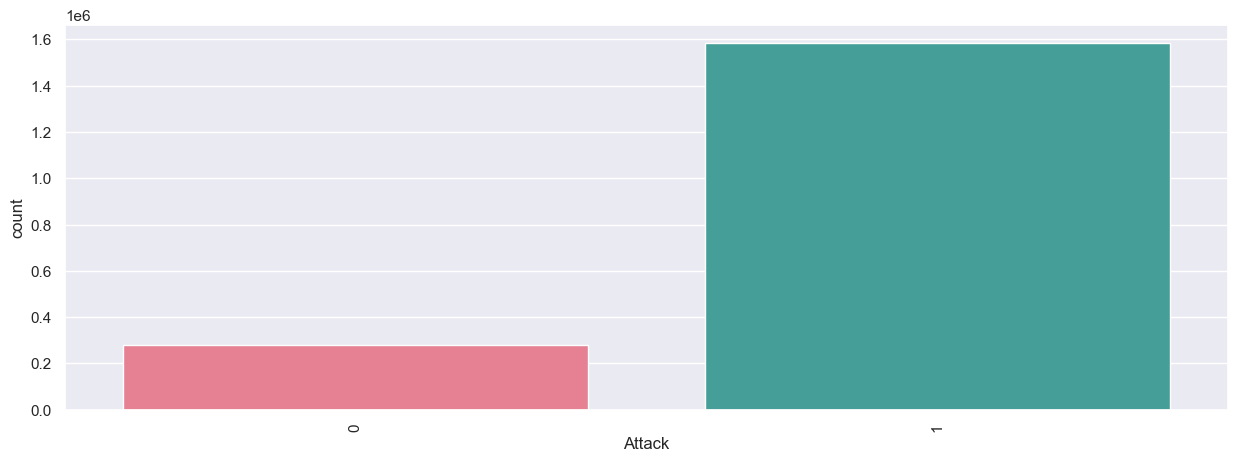

In [14]:
#check unique value for each column Attack
print('---- Attack ----')
print(df['Attack'].unique())
print('Number of attacks:', len(df['Attack'].unique()))
colors = sb.color_palette("husl", len(df['Attack'].unique()))
sb.set(rc={'figure.figsize':(15,5)})
#Plot Bar chart to understand Attacks
p=sb.countplot(x='Attack', hue='Attack', data=df, palette=colors, legend=False)
_ = plt.setp(p.get_xticklabels(), rotation=90)

In [15]:
df = df.drop(columns=['Timestamp', 'Datapath_id', 'Ip_src', 'Ip_dst', 'Mac_src', 'Mac_dst',
                        'Ip_protocole', 'Port_src','Tcp_flags','NS','WCR','ECE','URG','SSL','SSH', 'Hard_timeout', 'Idle_timeout','Attack_type'])
df

,Arp,Arp_code,Port_dst,Icmp,Icmp_code,Icmp_type,Tcp,ACK,PSH,RST,...,Dhcp,Flow_duration,Flow_dur_nsec,Packet_count,Pkt_per_sec,Pkt_per_nsec,Bytes,Bytes_per_sec,Bytes_per_nsec,Attack
0,0,NaN,68.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,...,1.0,0,641000000,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0
1,0,NaN,68.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,...,1.0,10,644000000,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0
2,0,NaN,68.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,...,1.0,20,648000000,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0
3,0,NaN,68.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,...,1.0,30,656000000,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0
4,0,NaN,68.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,...,1.0,40,664000000,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864558,0,NaN,60444.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0,...,0.0,74,824000000,8,0.108108,9.708738e-09,3436,46.432432,4.169903e-06,1
1864559,0,NaN,60460.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0,...,0.0,74,811000000,7,0.094595,8.631319e-09,1922,25.972973,2.369914e-06,1
1864560,0,NaN,60444.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,...,0.0,74,811000000,2,0.027027,2.466091e-09,444,6.000000,5.474723e-07,1
1864561,0,NaN,60444.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,...,0.0,74,810000000,1,0.013514,1.234568e-09,1351,18.256757,1.667901e-06,1


# Missing value analysis

In [16]:
number_null_value=df.isnull().sum()
number_null_value

Arp                     0
Arp_code          1852689
Port_dst           338242
Icmp                11874
Icmp_code         1538195
Icmp_type         1538195
Tcp                 11874
ACK                649666
PSH                649666
RST                649666
SYN                649666
FIN                649666
Http                11874
Ftp                 11874
Udp                 11874
Dns                 11874
Dhcp                11874
Flow_duration           0
Flow_dur_nsec           0
Packet_count            0
Pkt_per_sec             0
Pkt_per_nsec            0
Bytes                   0
Bytes_per_sec           0
Bytes_per_nsec          0
Attack                  0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1864563 entries, 0 to 1864562
Data columns (total 26 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Arp             int64  
 1   Arp_code        float64
 2   Port_dst        float64
 3   Icmp            float64
 4   Icmp_code       float64
 5   Icmp_type       float64
 6   Tcp             float64
 7   ACK             float64
 8   PSH             float64
 9   RST             float64
 10  SYN             float64
 11  FIN             float64
 12  Http            float64
 13  Ftp             float64
 14  Udp             float64
 15  Dns             float64
 16  Dhcp            float64
 17  Flow_duration   int64  
 18  Flow_dur_nsec   int64  
 19  Packet_count    int64  
 20  Pkt_per_sec     float64
 21  Pkt_per_nsec    float64
 22  Bytes           int64  
 23  Bytes_per_sec   float64
 24  Bytes_per_nsec  float64
 25  Attack          int64  
dtypes: float64(20), int64(6)
memory usage: 369.9 MB


In [18]:
df[['Arp_code','Icmp_code','Icmp_type']] = df[['Arp_code','Icmp_code','Icmp_type']].fillna(-1).copy()
df[['Arp','Port_dst','Icmp','Tcp', 'ACK', 'PSH', 'RST', 'SYN', 'FIN', 'Http', 'Ftp', 'Udp', 'Dns', 'Dhcp']] = df[['Arp','Port_dst','Icmp','Tcp', 'ACK', 'PSH', 'RST', 'SYN', 'FIN', 'Http', 'Ftp', 'Udp', 'Dns', 'Dhcp']].fillna(0).copy()

# Correlation Analysis

### Data description

In [19]:
df.describe()

,Arp,Arp_code,Port_dst,Icmp,Icmp_code,Icmp_type,Tcp,ACK,PSH,RST,...,Dhcp,Flow_duration,Flow_dur_nsec,Packet_count,Pkt_per_sec,Pkt_per_nsec,Bytes,Bytes_per_sec,Bytes_per_nsec,Attack
count,1.864563e+06,1.864563e+06,1.864563e+06,1.864563e+06,1.864563e+06,1.864563e+06,1.864563e+06,1.864563e+06,1.864563e+06,1.864563e+06,...,1.864563e+06,1.864563e+06,1.864563e+06,1.864563e+06,1.864563e+06,1.864563e+06,1.864563e+06,1.864563e+06,1.864563e+06,1.864563e+06
mean,6.368248e-03,-9.836299e-01,1.307224e+04,1.750373e-01,-8.242773e-01,5.670235e-01,6.515720e-01,3.783702e-01,1.257152e-01,3.672979e-02,...,6.714710e-04,2.483750e+01,4.956385e+08,1.903991e+02,1.426158e+01,1.840200e-06,4.801560e+06,3.572297e+05,5.404087e-02,8.496849e-01
std,7.954682e-02,2.082615e-01,2.171975e+04,3.799991e-01,3.841692e-01,3.411146e+00,4.764725e-01,4.849807e-01,3.315283e-01,1.880977e-01,...,2.590406e-02,1.809135e+01,2.874235e+08,4.102711e+03,6.197134e+02,2.245038e-04,1.478351e+08,2.196727e+07,9.708830e+00,3.573801e-01
min,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,-1.000000e+00,2.100000e+01,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,9.000000e+00,2.480000e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,0.000000e+00,-1.000000e+00,5.300000e+01,0.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,2.200000e+01,4.920000e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,0.000000e+00,-1.000000e+00,3.455200e+04,0.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,4.000000e+01,7.430000e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,1.000000e+00,2.000000e+00,6.099800e+04,1.000000e+00,3.000000e+00,8.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.160000e+02,9.990000e+08,2.855880e+05,1.170120e+05,1.544450e-01,1.309046e+10,5.247171e+09,6.874668e+03,1.000000e+00


### Data correlation

<Axes: >

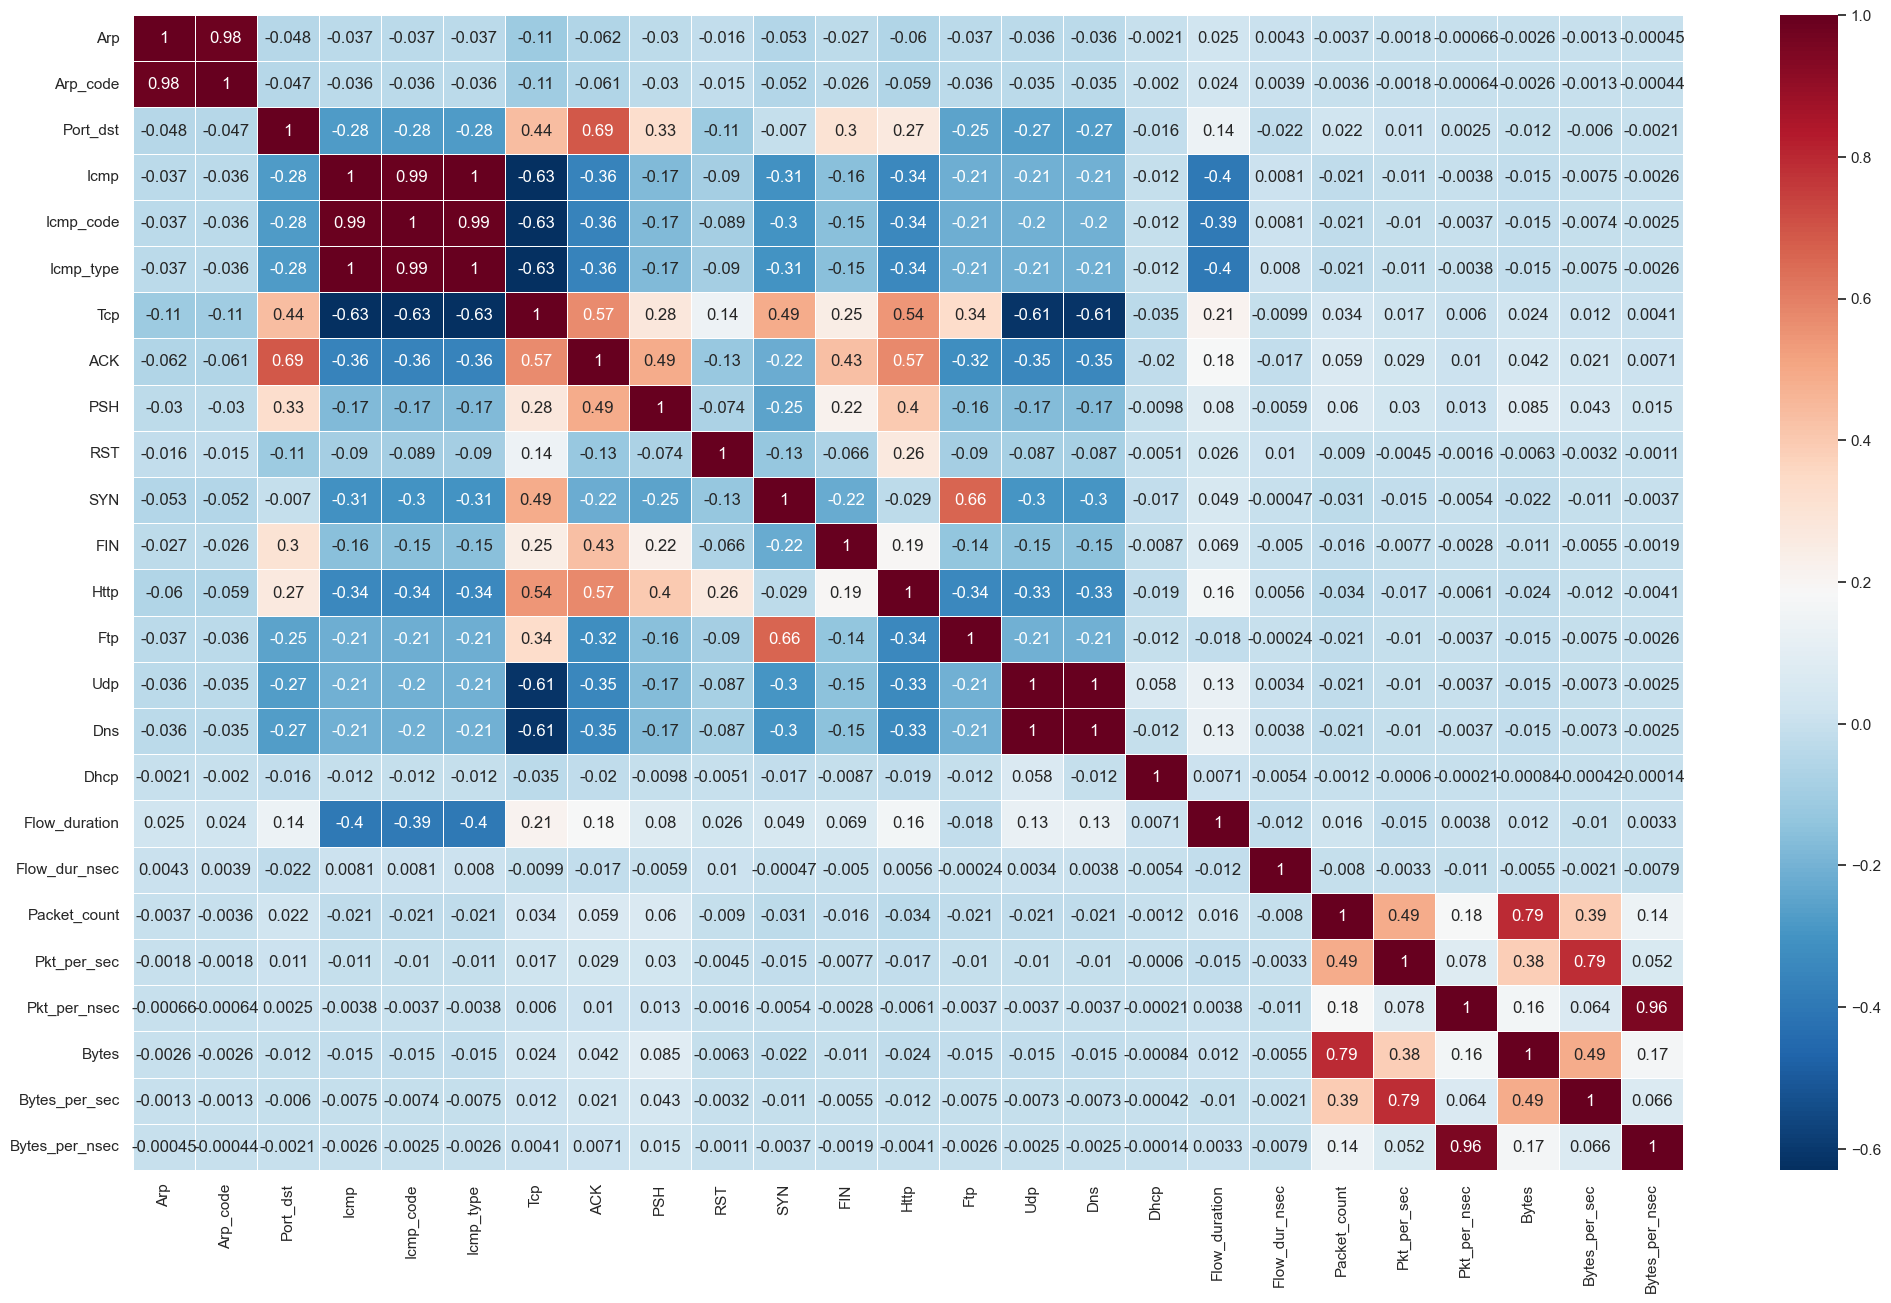

In [20]:
matrix_corr_pearson = df.drop(columns=['Attack'], axis=1).corr(method='pearson')
sb.set(rc={'figure.figsize':(25,15)})
sb.heatmap(matrix_corr_pearson,
            xticklabels=matrix_corr_pearson.columns,
            yticklabels=matrix_corr_pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [21]:
columnsdrop=['Bytes_per_nsec','Pkt_per_nsec','Flow_dur_nsec','Dns','Icmp','Icmp_code','Arp']
df=df.drop(columns=columnsdrop,axis=1)
df

,Arp_code,Port_dst,Icmp_type,Tcp,ACK,PSH,RST,SYN,FIN,Http,Ftp,Udp,Dhcp,Flow_duration,Packet_count,Pkt_per_sec,Bytes,Bytes_per_sec,Attack
0,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0.000000,0,0.000000,0
1,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10,0,0.000000,0,0.000000,0
2,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,20,0,0.000000,0,0.000000,0
3,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,30,0,0.000000,0,0.000000,0
4,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,40,0,0.000000,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864558,-1.0,60444.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,74,8,0.108108,3436,46.432432,1
1864559,-1.0,60460.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,74,7,0.094595,1922,25.972973,1
1864560,-1.0,60444.0,-1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,74,2,0.027027,444,6.000000,1
1864561,-1.0,60444.0,-1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,74,1,0.013514,1351,18.256757,1


# Feature Engineering

In [22]:
columns=list(df.columns)
columns

['Arp_code',
 'Port_dst',
 'Icmp_type',
 'Tcp',
 'ACK',
 'PSH',
 'RST',
 'SYN',
 'FIN',
 'Http',
 'Ftp',
 'Udp',
 'Dhcp',
 'Flow_duration',
 'Packet_count',
 'Pkt_per_sec',
 'Bytes',
 'Bytes_per_sec',
 'Attack']

In [23]:
df.dtypes

Arp_code         float64
Port_dst         float64
Icmp_type        float64
Tcp              float64
ACK              float64
PSH              float64
RST              float64
SYN              float64
FIN              float64
Http             float64
Ftp              float64
Udp              float64
Dhcp             float64
Flow_duration      int64
Packet_count       int64
Pkt_per_sec      float64
Bytes              int64
Bytes_per_sec    float64
Attack             int64
dtype: object

In [24]:
print(len(df['Attack'].unique()))

2


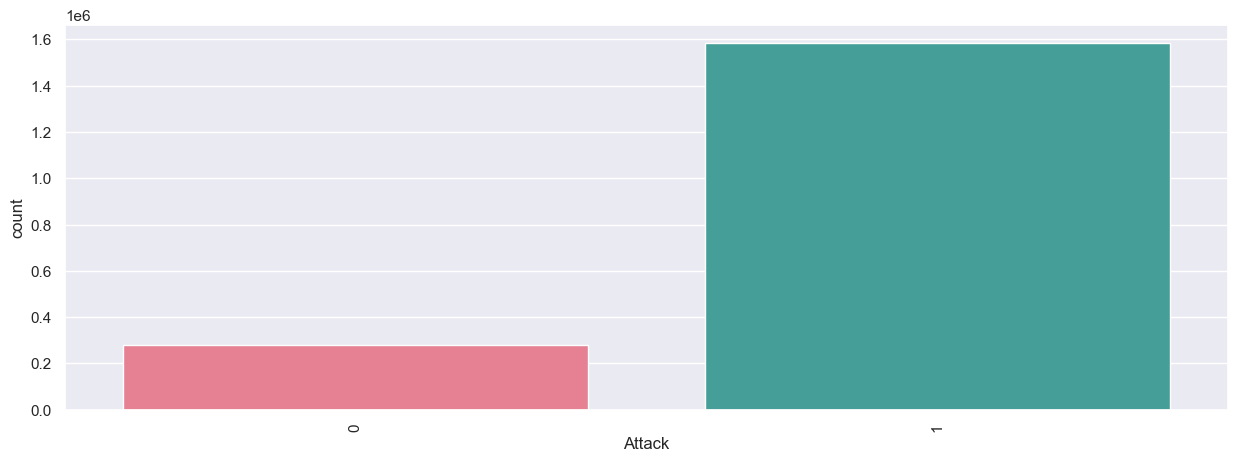

In [25]:
colors = sb.color_palette("husl", len(df['Attack'].unique()))
sb.set(rc={'figure.figsize':(15,5)})
#Plot Bar chart to understand Attack types
p=sb.countplot(x='Attack', hue='Attack', data=df, palette=colors, legend=False)
_ = plt.setp(p.get_xticklabels(), rotation=90)

In [26]:
df.groupby('Attack').size()

Attack
0     280272
1    1584291
dtype: int64

In [27]:
df.shape

(1864563, 19)

# Dataset Separation


In [28]:
df_attack = df[df['Attack']==1]
df_attack=df_attack.reset_index(drop=True)
df_attack

,Arp_code,Port_dst,Icmp_type,Tcp,ACK,PSH,RST,SYN,FIN,Http,Ftp,Udp,Dhcp,Flow_duration,Packet_count,Pkt_per_sec,Bytes,Bytes_per_sec,Attack
0,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3,0,0.000000,0,0.000000,1
1,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,13,0,0.000000,0,0.000000,1
2,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,23,0,0.000000,0,0.000000,1
3,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,33,0,0.000000,0,0.000000,1
4,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,43,0,0.000000,0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584286,-1.0,60444.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,74,8,0.108108,3436,46.432432,1
1584287,-1.0,60460.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,74,7,0.094595,1922,25.972973,1
1584288,-1.0,60444.0,-1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,74,2,0.027027,444,6.000000,1
1584289,-1.0,60444.0,-1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,74,1,0.013514,1351,18.256757,1


In [38]:
df_attack = df_attack.drop('Attack', axis=1)
df_attack

,Arp_code,Port_dst,Icmp_type,Tcp,ACK,PSH,RST,SYN,FIN,Http,Ftp,Udp,Dhcp,Flow_duration,Packet_count,Pkt_per_sec,Bytes,Bytes_per_sec
0,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3,0,0.000000,0,0.000000
1,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,13,0,0.000000,0,0.000000
2,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,23,0,0.000000,0,0.000000
3,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,33,0,0.000000,0,0.000000
4,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,43,0,0.000000,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584286,-1.0,60444.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,74,8,0.108108,3436,46.432432
1584287,-1.0,60460.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,74,7,0.094595,1922,25.972973
1584288,-1.0,60444.0,-1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,74,2,0.027027,444,6.000000
1584289,-1.0,60444.0,-1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,74,1,0.013514,1351,18.256757


In [29]:
df= df[df['Attack']==0]
df=df.reset_index(drop=True)
df

,Arp_code,Port_dst,Icmp_type,Tcp,ACK,PSH,RST,SYN,FIN,Http,Ftp,Udp,Dhcp,Flow_duration,Packet_count,Pkt_per_sec,Bytes,Bytes_per_sec,Attack
0,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0.000000,0,0.000000e+00,0
1,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10,0,0.000000,0,0.000000e+00,0
2,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,20,0,0.000000,0,0.000000e+00,0
3,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,30,0,0.000000,0,0.000000e+00,0
4,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,40,0,0.000000,0,0.000000e+00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280267,-1.0,5005.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52,4020,77.307692,6083384,1.169882e+05,0
280268,-1.0,5005.0,-1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52,147079,2828.442308,6685020814,1.285581e+08,0
280269,-1.0,34228.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52,110957,2133.788462,7323330,1.408333e+05,0
280270,-1.0,5005.0,-1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,50,0,0.000000,0,0.000000e+00,0


In [30]:
df=df.drop('Attack', axis=1)
df

,Arp_code,Port_dst,Icmp_type,Tcp,ACK,PSH,RST,SYN,FIN,Http,Ftp,Udp,Dhcp,Flow_duration,Packet_count,Pkt_per_sec,Bytes,Bytes_per_sec
0,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0.000000,0,0.000000e+00
1,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10,0,0.000000,0,0.000000e+00
2,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,20,0,0.000000,0,0.000000e+00
3,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,30,0,0.000000,0,0.000000e+00
4,-1.0,68.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,40,0,0.000000,0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280267,-1.0,5005.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52,4020,77.307692,6083384,1.169882e+05
280268,-1.0,5005.0,-1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52,147079,2828.442308,6685020814,1.285581e+08
280269,-1.0,34228.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52,110957,2133.788462,7323330,1.408333e+05
280270,-1.0,5005.0,-1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,50,0,0.000000,0,0.000000e+00


In [35]:
df.describe()

,Arp_code,Port_dst,Icmp_type,Tcp,ACK,PSH,RST,SYN,FIN,Http,Ftp,Udp,Dhcp,Flow_duration,Packet_count,Pkt_per_sec,Bytes,Bytes_per_sec
count,280272.000000,280272.000000,280272.000000,280272.000000,280272.000000,280272.000000,280272.0,280272.000000,280272.000000,280272.000000,280272.000000,280272.000000,280272.000000,280272.000000,280272.000000,280272.000000,2.802720e+05,2.802720e+05
mean,-0.893132,39367.659377,-0.940379,0.942149,0.807423,0.145880,0.0,0.269353,0.270080,0.087626,0.053291,0.004253,0.004253,29.742033,1264.108762,94.683596,3.194300e+07,2.376521e+06
std,0.522375,18589.095883,0.696661,0.233462,0.394324,0.352986,0.0,0.443624,0.444002,0.282750,0.224614,0.065076,0.065076,17.517485,10517.680835,1595.932316,3.801702e+08,5.661748e+07
min,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,-1.000000,35905.000000,-1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
50%,-1.000000,44102.000000,-1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
75%,-1.000000,52563.000000,-1.000000,1.000000,1.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,45.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
max,2.000000,60986.000000,8.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,116.000000,285588.000000,117012.000000,1.309046e+10,5.247171e+09


# Train, validation and test dataset

In [41]:
X_train, X_valid, X_test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

C:\Users\HF\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [43]:
print(X_train['Port_dst'].describe())

count    168163.000000
mean      39376.112611
std       18591.805584
min           0.000000
25%       35909.000000
50%       44120.000000
75%       52563.000000
max       60986.000000
Name: Port_dst, dtype: float64


In [47]:
from feature_engine.encoding import CountFrequencyEncoder
X_train['Port_dst'] = X_train['Port_dst'].astype('object')
X_test['Port_dst'] = X_test['Port_dst'].astype('object')
count_enc = CountFrequencyEncoder(
    encoding_method="frequency", 
    variables=['Port_dst'])
count_enc.fit(X_train)
X = count_enc.transform(df)
X_attack= count_enc.transform(df_attack)
X_train = count_enc.transform(X_train)
print(X_train['Port_dst'].describe())
X_test = count_enc.transform(X_test)

count    168163.000000
mean          0.007292
std           0.015976
min           0.000036
25%           0.000339
50%           0.000517
75%           0.000702
max           0.053484
Name: Port_dst, dtype: float64


C:\Users\HF\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\feature_engine\encoding\base_encoder.py:260: UserWarning: During the encoding, NaN values were introduced in the feature(s) Port_dst.
  warnings.warn(


## Standardization

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num=['Flow_duration', 'Packet_count',	'Pkt_per_sec',	'Bytes'	,'Bytes_per_sec']
scaler.fit(X_train[num])
X_train[num] = scaler.transform(X_train[num])
X_attack[num] = scaler.transform(X_attack[num])
X[num] = scaler.transform(X[num])
X_test[num] = scaler.transform(X_test[num])

In [50]:
from sklearn import metrics
import numpy as np
import pandas as pd
from IPython.display import display, HTML 
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.optimizers import Adam
model = tf.keras.Squential(
[    tf.keras.layers.Dense(15 ,input_dim=df.shape[1]),
     tf.keras.layers.Dense(8),
     tf.keras.layers.Dense(df.shape[1]) ])# Multiple output neurons
model.compile(loss='mean_squared_error', optimizer=Adam(), metrics=["accuracy"])
model.summary()

ModuleNotFoundError: No module named 'tensorflow.python'